<a href="https://colab.research.google.com/github/swENGsh/ImageProcessing/blob/master/%EA%B3%A0%EC%8A%B9%ED%9A%A8_%EC%9D%98%EB%A3%8C%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

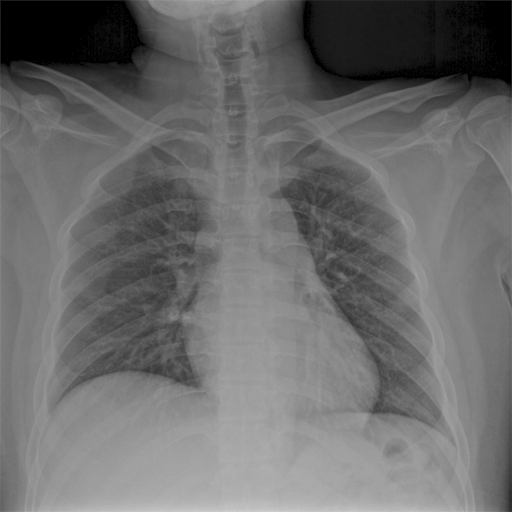

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("chest.bmp",cv2.IMREAD_GRAYSCALE)
cv2_imshow(image) #cv2.imshow("Original Image",image)
cv2.waitKey(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


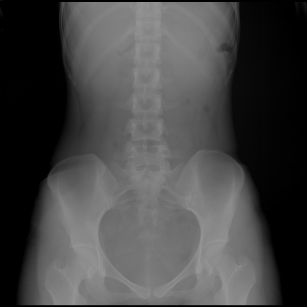

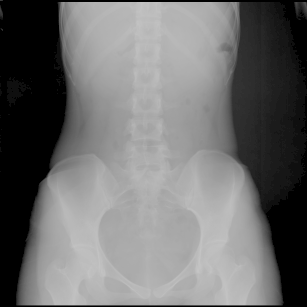

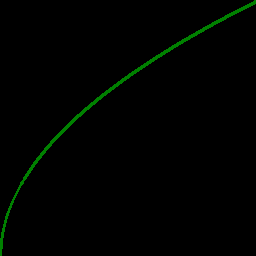

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#멱함수 변환 함수
def power_transform(gamma,LUT) :
    for i in range(0, 256) :
        tmp=255.0*pow((i/255.0), gamma)
        if tmp>255 :
            tmp=255
        LUT[i]=tmp

image = cv2.imread("abdomen SUPINE sens-197 highdose.bmp",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, None, fx = 0.1, fy=0.1, interpolation=cv2.INTER_AREA)
dst = image.copy()


# gamma 값(변동 가능)                                   
gamma=0.5                       

#멱함수 변환 시 사용되는 1차원 배열  
LUT = np.zeros(256, np.uint8)      
power_transform(gamma, LUT)

w = image.shape[1]
h = image.shape[0]

for i in range (0,h) :
    for j in range(0, w) :
        dst[i][j] = LUT[image[i][j]]     # dst 이미지 변환(멱함수 변환)


cv2_imshow(image)
cv2_imshow(dst)


# LUT 생성 함수
def power_transform(gamma,LUT) :
    i=0
    for i in range(0,256) :
        tmp=255.0*pow((i/255.0), gamma)  # 0~255 -> 0~1
        if tmp>255 :
            tmp=255
        LUT[i]=tmp          

# 그래프 생성
def view_1d(mat,size,data,DX,DY,yscale):
    cv2.rectangle(mat, (0,0), (256,256), (0,0,0), -1)
    i=0
    for i in range(0,size-1):
       cv2.line(mat,(DX+i,DY-yscale*data[i]),(DX+i+1,DY-yscale*data[i+1]),(0,128,0),2)

# 2차원 컬러 이미지 생성
view = np.zeros((256,256,3),np.uint8) 
LUT = np.zeros(256,np.uint8)

gamma = 0.5
power_transform(gamma, LUT)
view_1d(view, 256, LUT, 0, 256, 1)
cv2_imshow(view)


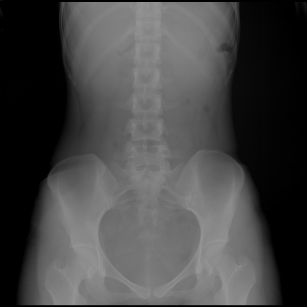

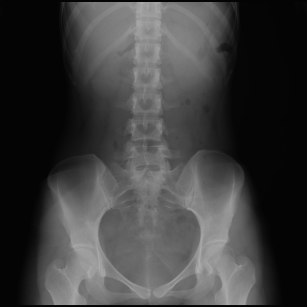

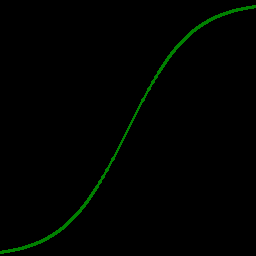

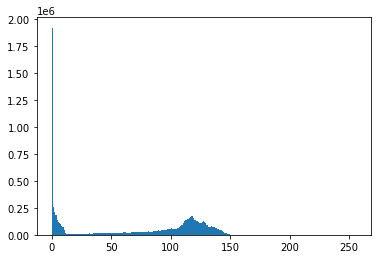

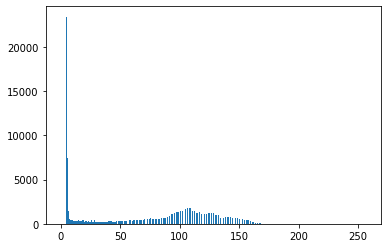

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#멱함수 변환 함수
def sigmoid_transform(a, c, LUT) :
    for i in range(0, 256) :
        tmp = 255.0*1/(1+np.exp(-a*(i/255.0-c)))
        if tmp>255 :
            tmp=255
        LUT[i]=tmp

image = cv2.imread("abdomen SUPINE sens-197 highdose.bmp",cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, None, fx = 0.1, fy=0.1, interpolation=cv2.INTER_AREA)
dst = image.copy()


# a,c 값(변동 가능)                                   
a=8
c=0.5                       

#멱함수 변환 시 사용되는 1차원 배열  
LUT = np.zeros(256, np.uint8)      
sigmoid_transform(a, c, LUT)

w = image.shape[1]
h = image.shape[0]

for i in range (0,h) :
    for j in range(0, w) :
        dst[i][j] = LUT[image[i][j]]     # dst 이미지 변환(멱함수 변환)


cv2_imshow(image)
cv2_imshow(dst)


# 그래프 생성
def view_1d(mat,size,data,DX,DY,yscale):
    cv2.rectangle(mat, (0,0), (256,256), (0,0,0), -1)
    i=0
    for i in range(0,size-1):
       cv2.line(mat,(DX+i,DY-yscale*data[i]),(DX+i+1,DY-yscale*data[i+1]),(0,128,0),2)

# 2차원 컬러 이미지 생성
view = np.zeros((256,256,3),np.uint8) 
LUT = np.zeros(256,np.uint8)

a=8
c=0.5  
sigmoid_transform(a, c, LUT)
view_1d(view, 256, LUT, 0, 256, 1)
cv2_imshow(view)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()
plt.hist(dst.ravel(), 256, [0, 256])
plt.show()

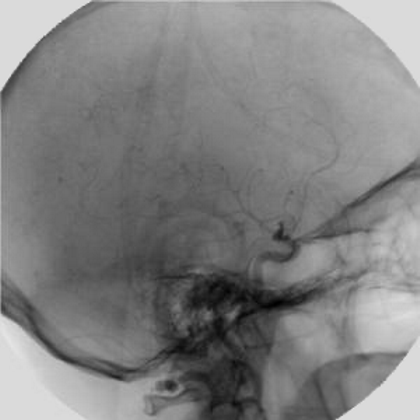

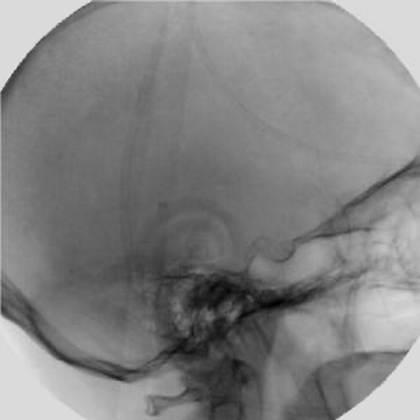

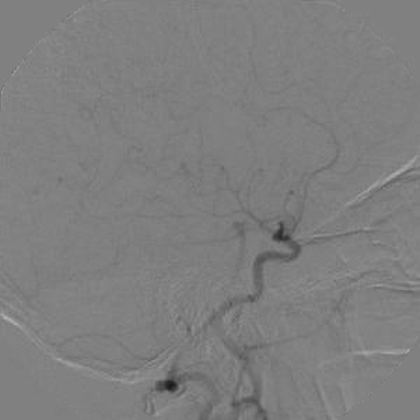

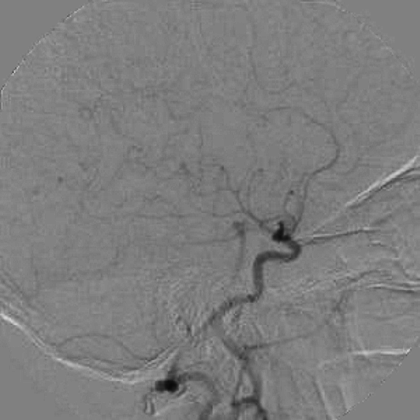

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#멱함수 변환 함수
def sigmoid_transform(a, c, LUT) :
    for i in range(0, 256) :
        tmp = 255.0*1/(1+np.exp(-a*(i/255.0-c)))
        if tmp>255 :
            tmp=255
        LUT[i]=tmp

image1 = cv2.imread("angiography_live_image.bmp",cv2.IMREAD_GRAYSCALE)

image2 = cv2.imread("angiography_mask_image.bmp",cv2.IMREAD_GRAYSCALE)

result = (image1- image2)+128

dst = result.copy()

cv2_imshow(image1)
cv2_imshow(image2)


# a,c 값(변동 가능)                                   
a=8
c=0.5                       

#멱함수 변환 시 사용되는 1차원 배열  
LUT = np.zeros(256, np.uint8)      
sigmoid_transform(a, c, LUT)

w = result.shape[1]
h = result.shape[0]

for i in range (0,h) :
    for j in range(0, w) :
        dst[i][j] = LUT[result[i][j]]     # dst 이미지 변환(멱함수 변환)


cv2_imshow(result)
cv2_imshow(dst)


(15, 15) float32
-0.00052406004
-0.0076007047
-0.021365883
-0.037253834
-0.042389546
-0.021948937
0.026671385
0.084324114
0.11890248
0.109238535
0.062498815
0.0076612355
-0.027933417
-0.036096454
-0.026335016
-0.0075950315
-0.023004832
-0.043213435
-0.052976556
-0.029577695
0.038591143
0.1315662
0.19987676
0.19783203
0.12195832
0.016170252
-0.06313985
-0.08793231
-0.069115475
-0.035891596
-0.02135253
-0.043211434
-0.057074312
-0.03435945
0.048134964
0.17695746
0.2896448
0.30885127
0.20515546
0.029420959
-0.12303106
-0.18465647
-0.15636843
-0.08748325
-0.0274513
-0.03724866
-0.05300657
-0.034407984
0.051756475
0.20517547
0.36182728
0.41565624
0.29749978
0.0461444
-0.20666061
-0.33428168
-0.3049685
-0.18381847
-0.062163766
0.008331781
-0.042437594
-0.029703207
0.047973316
0.2050756
0.38964486
0.48222673
0.37189656
0.062388342
-0.2992488
-0.5216662
-0.512735
-0.3329549
-0.12135103
0.017424477
0.063097924
-0.02210439
0.038332377
0.17669922
0.3617168
0.48228118
0.40076482
0.07271269
-0.3735

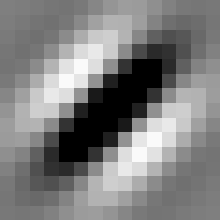

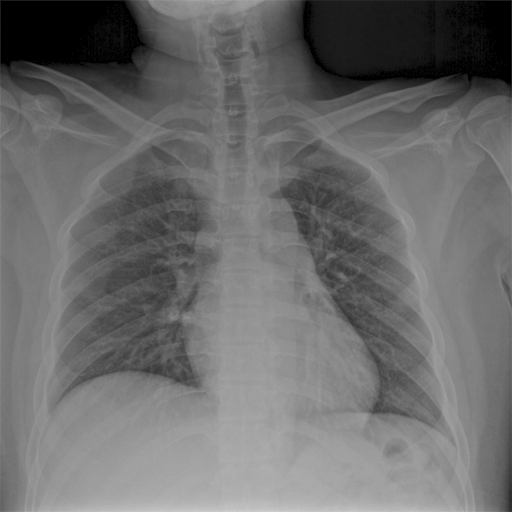

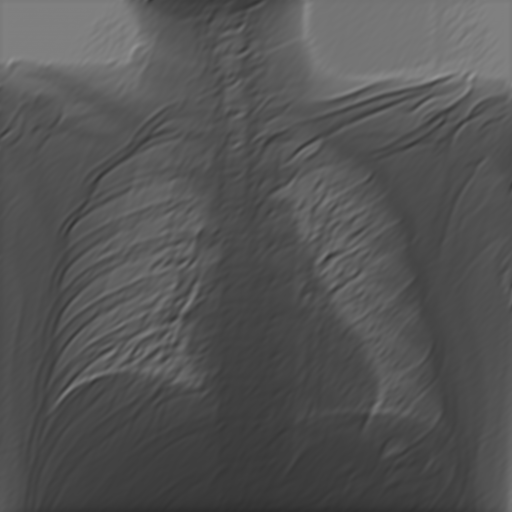

In [ ]:
#-*- coding: utf-8 -*- -#
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# gabor filter
kernel = cv2.getGaborKernel(
    (15,15), # Size of filter
    3.12,   # Standard deviation of the gaussian envelope
    3.14/4, # Orientation of the normal to the parallel stripes of a Gabor function(세타)
    8,      # Wavelength of the sinusoidal factor(감마값(길이))
    0.85,   # Spatial aspect ratio
    3.14,   # Phase offset
    ktype=cv2.CV_32F    # Type of filter coefficients
)

print (kernel.shape, kernel.dtype)

for y in range(0, kernel.shape[0]):
    for x in range(0, kernel.shape[1]) :
        print (kernel[y,x])

# Gabor 필터 보기
dst = cv2.resize(kernel, (220,220), interpolation = cv2.INTER_NEAREST)
dst = dst+0.5  # 음수 값을 필터 계수를 나타내기 위해 0.5 더한다
cv2_imshow(255*dst)

image=cv2.imread("chest.bmp", cv2.IMREAD_GRAYSCALE)

dst = cv2.filter2D(
    image,          # 입력영상
    cv2.CV_32FC1,   # 결과데이터 타입
    kernel           # 필터
)

# display를 위해 float 형 영상을 unsigned int 8 bit 로 변경
u_img = np.uint8(dst/10 + 128)

cv2_imshow(image)
cv2_imshow(u_img)

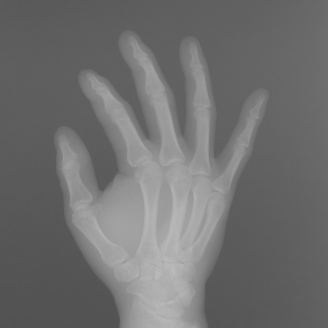

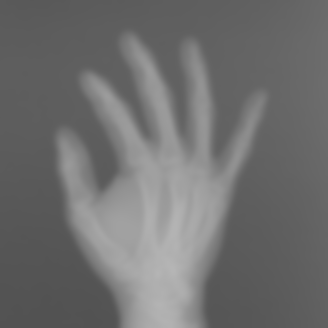

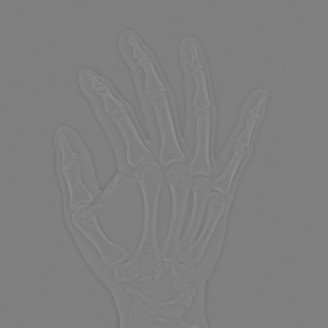

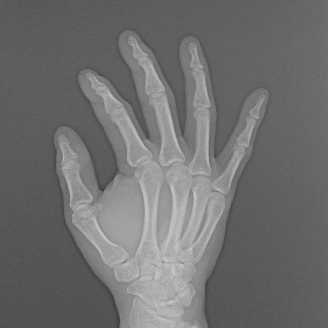

In [ ]:
#-*- coding: utf-8 -*- -#

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def rectify(img, w, h):
    for i in range (0, h):
        for j in range(0, w) :
            if img[i][j]<0.0 :
                img[i][j]=0.0
            elif img[i][j]>255.0 :
                img[i][j]=255.0

image=cv2.imread("hand.bmp", cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

w=image.shape[1]
h=image.shape[0]

# gaussian smoothing
f_img = np.float32(image)
smooth = cv2.GaussianBlur(f_img, (15, 15), 0, 0)

# smooth는 실수값을 가지므로 8비트 unsigned int 로 변환 후 display
view = np.zeros((h,w), dtype = np.uint8)
view = np.uint8(smooth)
cv2_imshow(smooth)

# 차영상
diff = f_img-smooth

# 차영상 보기
view=np.uint8(diff)
cv2_imshow(diff+128)

# enhance 영상
sharp = f_img + 2 * diff  # - ~ 255 보다 큰 값도 나올 수 있음
sharp = np.clip(sharp, 0, 255)
view=np.uint8(sharp)

cv2_imshow(sharp)

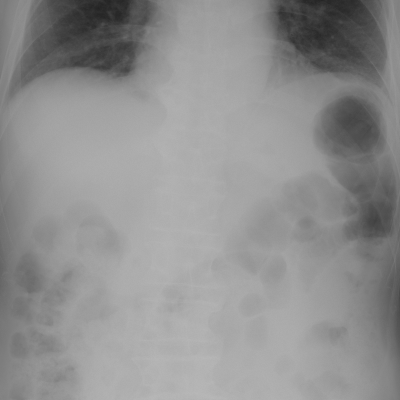

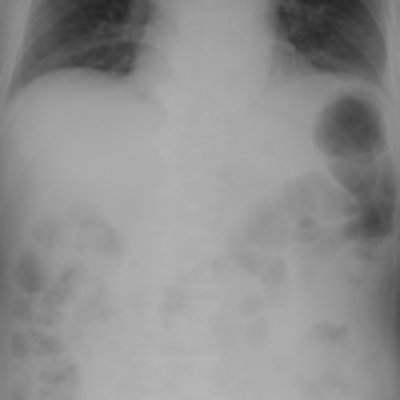

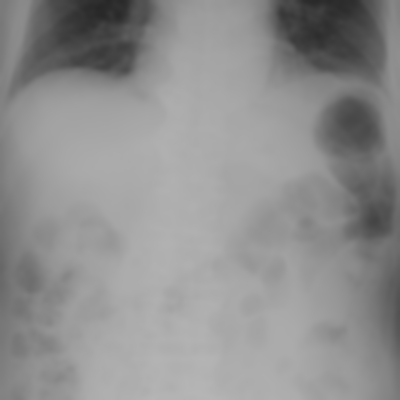

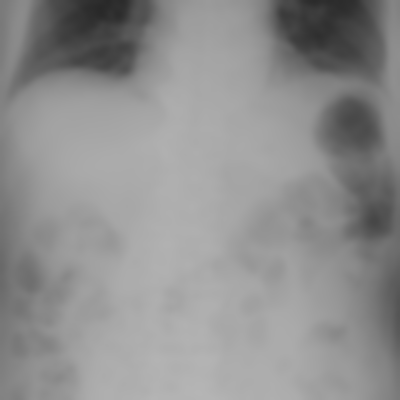

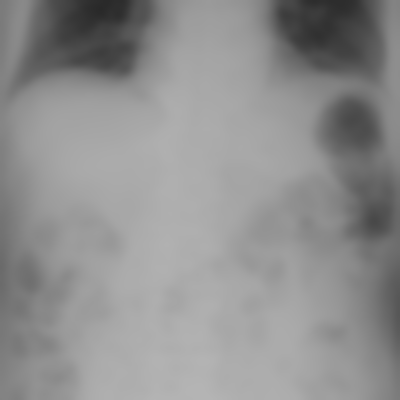

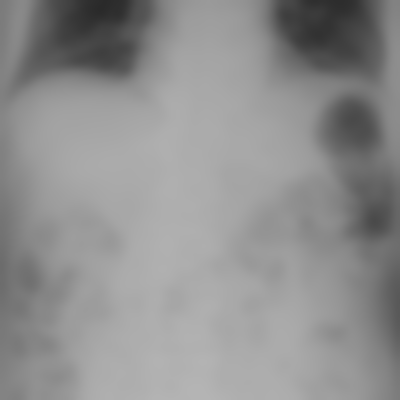

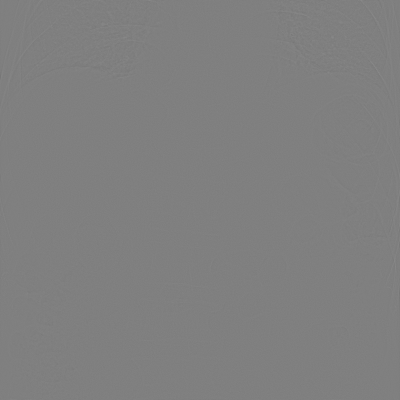

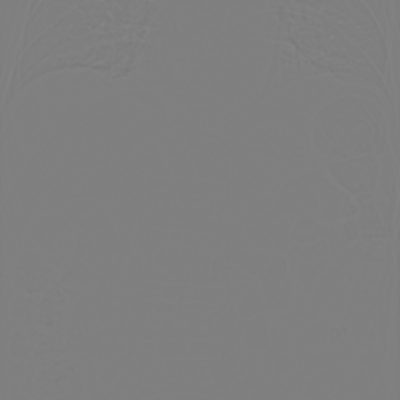

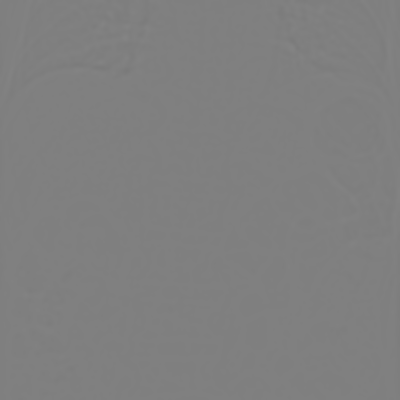

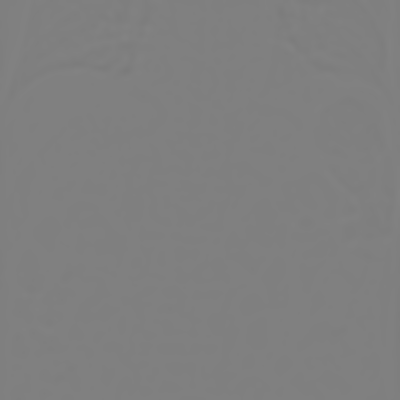

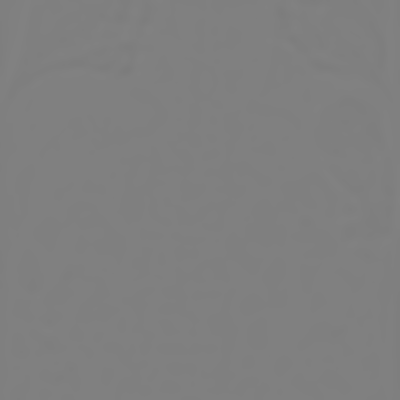

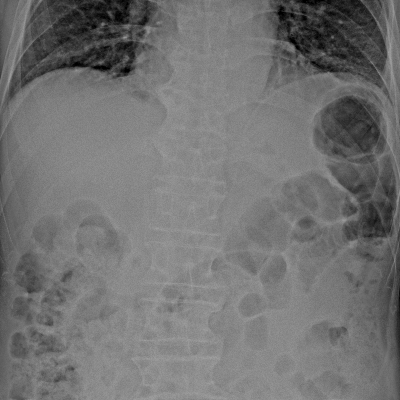

In [ ]:
#-*- coding: utf-8 -*- -#

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("abdomen.bmp", cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)

w = image.shape[1]
h = image.shape[0]

# gaussian smoothing
f_img = np.float32(image)
smooth1 = cv2.GaussianBlur(f_img, (5,5), 0, 0)
smooth2 = cv2.GaussianBlur(f_img, (11,11), 0, 0)
smooth3 = cv2.GaussianBlur(f_img, (17,17), 0, 0)
smooth4 = cv2.GaussianBlur(f_img, (23,23), 0, 0)
smooth5 = cv2.GaussianBlur(f_img, (29,29), 0, 0)

# smooth는 실수값을 가지므로 8비트 unsigned int 로 변환 후 display
view = np.uint8(smooth1)
view = np.uint8(smooth2)
view = np.uint8(smooth3)
view = np.uint8(smooth4)
view = np.uint8(smooth5)
cv2_imshow(smooth1)
cv2_imshow(smooth2)
cv2_imshow(smooth3)
cv2_imshow(smooth4)
cv2_imshow(smooth5)

# 차영상
diff1 = f_img - smooth1
diff2 = smooth1 - smooth2
diff3 = smooth2 - smooth3
diff4 = smooth3 - smooth4
diff5 = smooth4 - smooth5

# 차영상 보기
view = np.uint8(diff1)
view = np.uint8(diff2)
view = np.uint8(diff3)
view = np.uint8(diff4)
view = np.uint8(diff5)

cv2_imshow(diff1+128)
cv2_imshow(diff2+128)
cv2_imshow(diff3+128)
cv2_imshow(diff4+128)
cv2_imshow(diff5+128)

# enhance 영상
sharp = f_img + 3*(diff1 + diff2 + diff3 + diff4 + diff5) + -0.2*smooth5

sharp = np.clip(sharp, 0, 255)
view = np.uint8(sharp)

cv2_imshow(sharp)

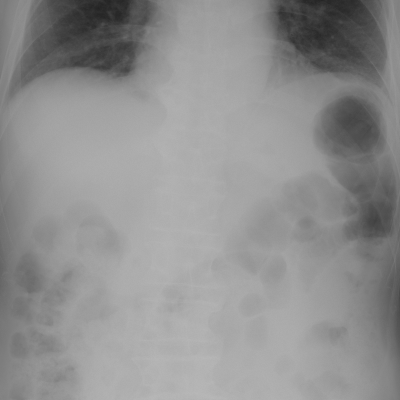

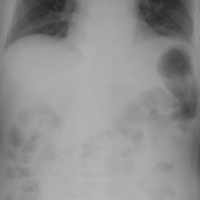

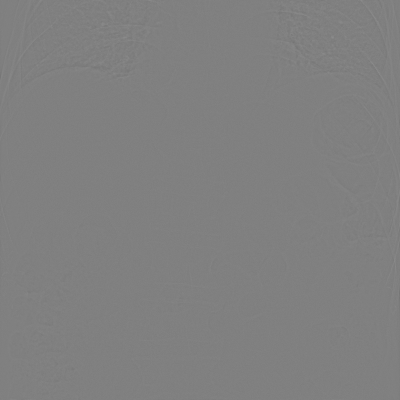

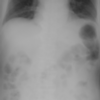

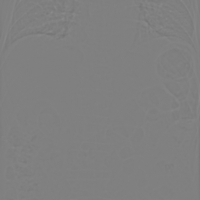

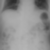

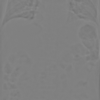

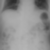

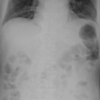

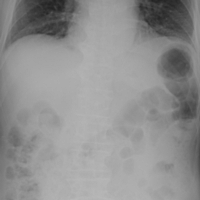

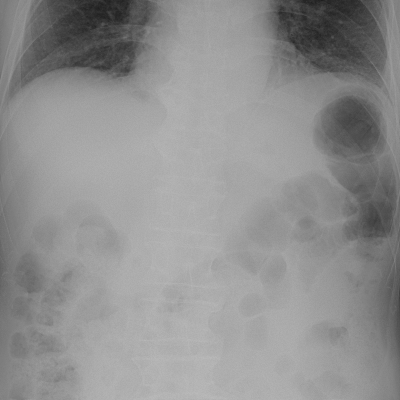

In [ ]:
#-*- coding: utf-8 -*- -#

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

I0 = cv2.imread("abdomen.bmp", cv2.IMREAD_GRAYSCALE)
cv2_imshow(I0)

w = I0.shape[1]
h = I0.shape[0]

I1 = cv2.pyrDown(I0)  # gaussian smoothing + down sampling 
U0 = cv2.pyrUp(I1)    # up sampling + gaussian smoothing 
D0 = I0 - U0
D0 = np.clip(D0+128, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(D0)

cv2_imshow(I1)
cv2_imshow(D0)

I2 = cv2.pyrDown(I1)  # gaussian smoothing + down sampling 
U1 = cv2.pyrUp(I2)    # up sampling + gaussian smoothing 
D1 = I1 - U1
D1 = np.clip(D1+128, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(D1)

cv2_imshow(I2)
cv2_imshow(D1)

I3 = cv2.pyrDown(I2)  # gaussian smoothing + down sampling 
U2 = cv2.pyrUp(I3)    # up sampling + gaussian smoothing 
D2 = I2 - U2
D2 = np.clip(D2+128, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(D2)

cv2_imshow(I3)
cv2_imshow(D2)

R3 = I3
cv2_imshow(R3)

R2 = U2 + 2 * D2
R2 = np.clip(R2, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(R2)
cv2_imshow(R2)

R1 = U1 + 2 * D1
R1 = np.clip(R1, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(R1)
cv2_imshow(R1)

R0 = U0 + 2 * D0
R0 = np.clip(R0, 0, 255)  # 0~255로 값을 제한, float 
view = np.uint8(R0)
cv2_imshow(R0)